## Clasificacion de Imagenes con aplicacion de filtro Sobel

Nombre: Alejandro Rojas Tzompantzi

El conjunto de datos que vamos a utilizar es de mariposas, este incluye 75 clases diferentes de mariposas. 
El conjunto de datos contiene más de 1.000 imágenes etiquetadas, incluidas las imágenes de validación y cada imagen pertenece a una sola categoría de mariposas.

En este repositorio se incluiran solo 84 imagenes de train y 28 de test para que notes que tipo de imagenes estamos usando.

Las etiquetas de cada imagen se guardan en train.csv

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
from matplotlib.image import imread
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from skimage.color import rgb2gray
from skimage.filters import sobel

In [15]:
#Leer el dataset
df = pd.read_csv("train.csv")
#Leer el dataset para hacer el test despues
test_label = pd.read_csv("test.csv")
#Enlistar los tipos de mariposas
butterfly_type=list(df.label.unique())
butterfly_type

['SOUTHERN DOGFACE',
 'ADONIS',
 'BROWN SIPROETA',
 'MONARCH',
 'GREEN CELLED CATTLEHEART',
 'CAIRNS BIRDWING',
 'EASTERN DAPPLE WHITE',
 'RED POSTMAN',
 'MANGROVE SKIPPER',
 'BLACK HAIRSTREAK',
 'CABBAGE WHITE',
 'RED ADMIRAL',
 'PAINTED LADY',
 'PAPER KITE',
 'SOOTYWING',
 'PINE WHITE',
 'PEACOCK',
 'CHECQUERED SKIPPER',
 'JULIA',
 'COMMON WOOD-NYMPH',
 'BLUE MORPHO',
 'CLOUDED SULPHUR',
 'STRAITED QUEEN',
 'ORANGE OAKLEAF',
 'PURPLISH COPPER',
 'ATALA',
 'IPHICLUS SISTER',
 'DANAID EGGFLY',
 'LARGE MARBLE',
 'PIPEVINE SWALLOW',
 'BLUE SPOTTED CROW',
 'RED CRACKER',
 'QUESTION MARK',
 'CRIMSON PATCH',
 'BANDED PEACOCK',
 'SCARCE SWALLOW',
 'COPPER TAIL',
 'GREAT JAY',
 'INDRA SWALLOW',
 'VICEROY',
 'MALACHITE',
 'APPOLLO',
 'TWO BARRED FLASHER',
 'MOURNING CLOAK',
 'TROPICAL LEAFWING',
 'POPINJAY',
 'ORANGE TIP',
 'GOLD BANDED',
 'BECKERS WHITE',
 'RED SPOTTED PURPLE',
 'MILBERTS TORTOISESHELL',
 'SILVER SPOT SKIPPER',
 'AMERICAN SNOOT',
 'AN 88',
 'ULYSES',
 'COMMON BANDED AWL',
 'C

In [16]:
image_dir = "imagenes_train/" #Directorio 
def preprocess(image_directory, image_name, size=128):
    image = imread(image_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((size, size))
    image = np.array(image)
    
    # Convertimos a escala de grises
    gray = rgb2gray(image)
    
    # Aplicamos filtro de Sobel
    edge_sobel = sobel(gray)
    
    # Expandimos dimensión para que sea compatible con Conv2D
    edge_sobel = np.expand_dims(edge_sobel, axis=-1)
    
    return edge_sobel

train_data = []
train_labels = []

for it in butterfly_type :
    data_curr_butterfly = df[df['label'] == it]
    curr_filenames = list(data_curr_butterfly['filename'])
    curr_labels = list(data_curr_butterfly['label'])
    for itr_no in range(len(curr_filenames)) :
        curr_image = preprocess(image_directory=image_dir, image_name=curr_filenames[itr_no])
        curr_label = curr_labels[itr_no]
        train_data.append(curr_image)
        train_labels.append(butterfly_type.index(curr_label))

## Justificación del filtro:
El filtro Sobel resalta los bordes y contornos en una imagen. En el contexto de la clasificación de mariposas, estos contornos pueden representar diferencias claves en la forma de las alas o patrones de las especies, haciendo que un modelo de aprendizaje automático pueda identificar mejor las características distintivas.

In [17]:
train_data=np.array(train_data)
train_labels=np.array(train_labels)

In [18]:
train_labels = to_categorical(train_labels)
classes=train_labels[0].shape[0]
classes
print(train_data.shape)
print(train_labels.shape)

(6499, 128, 128, 1)
(6499, 75)


MONARCH


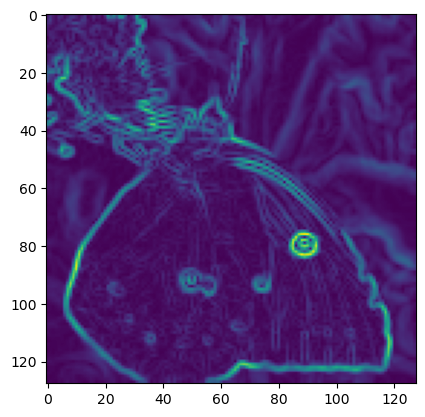

In [19]:
print(butterfly_type[3])#train_labels[2]])
plt.imshow(train_data[3])

In [20]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=train_data[0].shape,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(classes,activation="softmax")) #75 clases de mariposa

C:\Users\frene\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 75)                  │          76,875 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,095,339 (57.58 MB)

 Trainable params: 15,095,339 (57.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
history=model.fit(train_data,train_labels,epochs=10,batch_size=150)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 626ms/step - accuracy: 0.0310 - loss: 4.1710
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 622ms/step - accuracy: 0.2087 - loss: 3.1375
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 631ms/step - accuracy: 0.3781 - loss: 2.3917
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 630ms/step - accuracy: 0.5644 - loss: 1.6468
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 637ms/step - accuracy: 0.7546 - loss: 0.9546
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 42s 656ms/step - accuracy: 0.8915 - loss: 0.4594
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 643ms/step - accuracy: 0.9673 - loss: 0.1741
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 634ms/step - accuracy: 0.9948 - loss: 0.0524
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 603ms/step - accuracy: 0.9996 - loss: 0.0127
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 604ms/step - accuracy: 1.0000 - loss: 0.0045


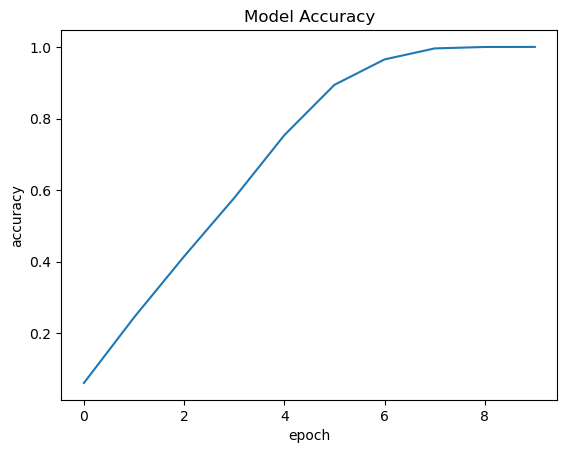

In [23]:
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

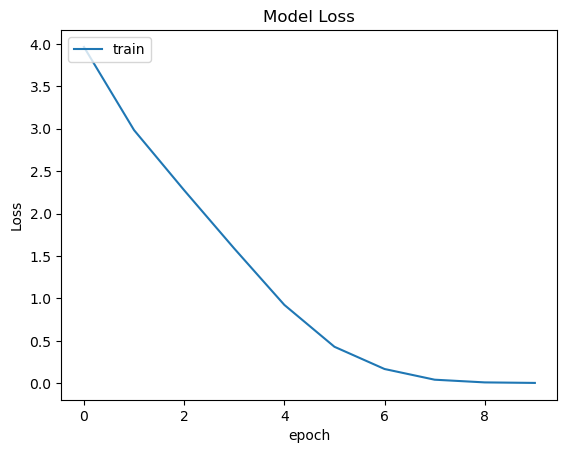

In [24]:
plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

Ahora procederemos a realizar las predicciones con las imagenes de test

In [26]:
test = "imagenes_test/"
result= []
for file_name in list(test_label['filename']) :
    curr_image = preprocess(image_directory=test, image_name=file_name)
    result.append(butterfly_type[np.argmax(model.predict(np.expand_dims(preprocess(image_directory=test, image_name=file_name), axis=0)))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━

In [27]:
test_label["label"]=result
test_label.head(10)

,filename,label
0,Image_1.jpg,PINE WHITE
1,Image_2.jpg,RED ADMIRAL
2,Image_3.jpg,ADONIS
3,Image_4.jpg,ATALA
4,Image_5.jpg,MILBERTS TORTOISESHELL
5,Image_6.jpg,CLOUDED SULPHUR
6,Image_7.jpg,PAPER KITE
7,Image_8.jpg,INDRA SWALLOW
8,Image_9.jpg,EASTERN PINE ELFIN
9,Image_10.jpg,ZEBRA LONG WING


PINE WHITE


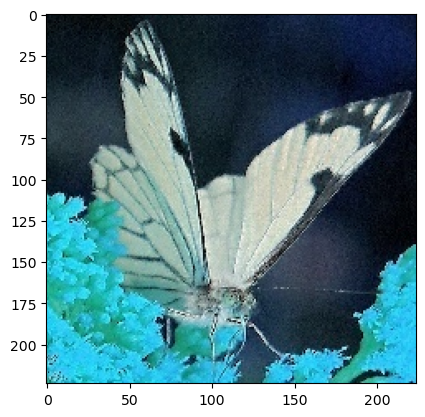

In [36]:
direct="imagenes_test/"
img_no="Image_1.jpg"
img=cv2.imread(direct+img_no)
img=Image.fromarray(img,"RGB")
plt.imshow(np.array(img))
print(test_label.label[0])

Viendo esta muestra, y buscando realmente cual es la mariposa "PINE WHITE", concluimos que el modelo acerto en el tipo de mariposa que era en la imagen